# Methodology: Twitter sentiment analysis on bitcoin

## 1. Forming the dataframe with all the tweet accounts scrapped

### Period scrapped in most of the accounts: 16/04/2018 to 20/11/2020

In [1]:
! pip install wordcloud

Processing /Users/andreoliveiragomes/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b/wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl


In [2]:
! pip install textblob

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# TextBlob - Python library for processing textual data
from textblob import TextBlob
# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud
# Regular Expression Python module
import re
# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [4]:
dataset1 = pd.read_csv("Tweets_andreas_antonoupolos_16042018_20112020.csv")

In [5]:
dataset2 = pd.read_csv("Tweets_Brian_aRmstrong_16042018_20112020.csv")

In [19]:
dataset3 = pd.read_csv("Tweets_CharlieLEE_16042018_201120200.csv")

In [20]:
dataset4 = pd.read_csv("Tweets_COInbase_16_04_2018_20112020.csv") 

In [21]:
dataset5 = pd.read_csv("Tweets_coindesk_16042018_20112020.csv")

In [22]:
dataset6 = pd.read_csv("Tweets_coinmarketcap_09052016_20112020.csv")

In [23]:
dataset7 = pd.read_csv("Tweets_coinmarketcap_all_period.csv")

In [24]:
dataset8 = pd.read_csv("Tweets_Erik_Vorhees_160418_20112020.csv")

In [25]:
dataset9 = pd.read_csv("Tweets_FErhsem_16042018_20112020.csv")

In [26]:
dataset10 = pd.read_csv("Tweets_JUSTINSUNTRO_16042018_20112020.csv")

In [27]:
dataset11 = pd.read_csv("Tweets_nexofinance_16042018_20112020.csv")

In [28]:
dataset12 = pd.read_csv("Tweets_RogerVER_16042018_20112020.csv")

In [29]:
dataset13 = pd.read_csv("Tweets_vitalik_16042018_20112020.csv")

In [30]:
frames = [dataset1,dataset2,dataset3, dataset4, dataset5, dataset6, dataset7, dataset8, dataset9, dataset10, dataset11, dataset12, dataset13]

In [31]:
result = pd.concat(frames)

In [32]:
result.head

<bound method NDFrame.head of                handle                         name  \
0           @aantonop  Andreas ☮ 🌈 ⚛ ⚖ 🌐 📡 📖 📹 🔑 🛩   
1           @aantonop  Andreas ☮ 🌈 ⚛ ⚖ 🌐 📡 📖 📹 🔑 🛩   
2           @aantonop  Andreas ☮ 🌈 ⚛ ⚖ 🌐 📡 📖 📹 🔑 🛩   
3           @aantonop  Andreas ☮ 🌈 ⚛ ⚖ 🌐 📡 📖 📹 🔑 🛩   
4           @aantonop  Andreas ☮ 🌈 ⚛ ⚖ 🌐 📡 📖 📹 🔑 🛩   
...               ...                          ...   
8387  @VitalikButerin                  vitalik.eth   
8388  @VitalikButerin                  vitalik.eth   
8389  @VitalikButerin                  vitalik.eth   
8390  @VitalikButerin                  vitalik.eth   
8391  @VitalikButerin                  vitalik.eth   

                                                content  replies  retweets  \
0     The first nine episodes of #Unscrypted are now...       63       169   
1                                @AmberBaldet It's time        1         0   
2     Bitcoin Q&A: Privacy, inflation risks, and cen...        9        41   
3     @wa

In [33]:
result.shape

(64129, 11)

In [34]:
result.to_csv("final_tweets.csv")

## 2. Exploration and preprocessing for sentiment analysis

In [35]:
tweets  = pd.read_csv("final_tweets.csv")

In [36]:
tweets.head()

,Unnamed: 0,handle,name,content,replies,retweets,favorite,unix_timestamp,date,url,search_url,hashtags
0,0,@aantonop,Andreas ☮ 🌈 ⚛ ⚖ 🌐 📡 📖 📹 🔑 🛩,The first nine episodes of #Unscrypted are now...,63,169,746,1571931018000,24 Oct 2019,aantonop/status/1187390870418579458,https://twitter.com/search?q=(from%3Aaantonop)...,Unscrypted
1,1,@aantonop,Andreas ☮ 🌈 ⚛ ⚖ 🌐 📡 📖 📹 🔑 🛩,@AmberBaldet It's time,1,0,3,1573607584000,13 Nov 2019,aantonop/status/1194422894509674497,https://twitter.com/search?q=(from%3Aaantonop)...,NaN
2,2,@aantonop,Andreas ☮ 🌈 ⚛ ⚖ 🌐 📡 📖 📹 🔑 🛩,"Bitcoin Q&A: Privacy, inflation risks, and cen...",9,41,85,1557511842000,10 May 2019,aantonop/status/1126912460349497345,https://twitter.com/search?q=(from%3Aaantonop)...,NaN
3,3,@aantonop,Andreas ☮ 🌈 ⚛ ⚖ 🌐 📡 📖 📹 🔑 🛩,"@waqasahmedch TIOM3 is a whole new book, entir...",1,0,3,1591832677000,10 Jun 2020,aantonop/status/1270864477550972928,https://twitter.com/search?q=(from%3Aaantonop)...,NaN
4,4,@aantonop,Andreas ☮ 🌈 ⚛ ⚖ 🌐 📡 📖 📹 🔑 🛩,Diving into WB21—the company holding $9 millio...,3,48,91,1553280632000,22 Mar 2019,aantonop/status/1109165481980649472,https://twitter.com/search?q=(from%3Aaantonop)...,WB21 | meritlesslegalthuggery | StreisandEffec...


### Preprocessing date

In [37]:
tweets.date

0        24 Oct 2019
1        13 Nov 2019
2        10 May 2019
3        10 Jun 2020
4        22 Mar 2019
            ...     
64124    05 Feb 2020
64125    11 Nov 2019
64126    15 Jun 2020
64127    06 Apr 2020
64128    08 Oct 2018
Name: date, Length: 64129, dtype: object

In [38]:
#ordering the tweets dataframe by date
tweets= tweets.sort_values(by='date')

In [39]:
tweets

,Unnamed: 0,handle,name,content,replies,retweets,favorite,unix_timestamp,date,url,search_url,hashtags
30769,3528,@CoinMarketCap,CoinMarketCap,"@HindwiSwarajya Yes, this account is linked fr...",0,0,0,1491065635000,01 Apr 2017,CoinMarketCap/status/848216871350521856,https://twitter.com/search?q=(from%3ACoinMarke...,NaN
33545,6304,@CoinMarketCap,CoinMarketCap,@HindwiSwarajya What's today's date? :),2,0,1,1491064318000,01 Apr 2017,CoinMarketCap/status/848211347544444930,https://twitter.com/search?q=(from%3ACoinMarke...,NaN
54595,1389,@NexoFinance,Nexo,The #NexoEverywhere campaign is in full swing ...,9,31,106,1554108726000,01 Apr 2019,NexoFinance/status/1112638760234176513,https://twitter.com/search?q=(from%3ANexoFinan...,NexoEverywhere
45317,3140,@ErikVoorhees,Erik Voorhees,“The goal of government is to protect individu...,20,86,278,1554128874000,01 Apr 2019,ErikVoorhees/status/1112723264445399042,https://twitter.com/search?q=(from%3AErikVoorh...,NaN
53482,276,@NexoFinance,Nexo,@DonMatteo500 @etherscan All stablecoin deposi...,1,0,2,1554117587000,01 Apr 2019,NexoFinance/status/1112675922367471617,https://twitter.com/search?q=(from%3ANexoFinan...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12292,2893,@CoinDesk,CoinDesk,Government officials called for backdoor acces...,2,12,20,1604177941000,31 Oct 2020,CoinDesk/status/1322644266531905536,https://twitter.com/search?q=(from%3ACoinDesk)...,Election2020
12240,2841,@CoinDesk,CoinDesk,"While Web 2.0 served, to an extent, to democra...",1,18,33,1604143880000,31 Oct 2020,CoinDesk/status/1322501404439814144,https://twitter.com/search?q=(from%3ACoinDesk)...,internet2030
11756,2357,@CoinDesk,CoinDesk,.@DaveNadig of @ETFTrends comes with 25 years ...,1,4,19,1604148037000,31 Oct 2020,CoinDesk/status/1322518841818230785,https://twitter.com/search?q=(from%3ACoinDesk)...,bitcoinforadvisors
35817,8576,@CoinMarketCap,CoinMarketCap,Here are the top 10 most searched on CMC this ...,27,13,107,1604108619000,31 Oct 2020,CoinMarketCap/status/1322353509375766528,https://twitter.com/search?q=(from%3ACoinMarke...,Bitcoinvault


In [40]:
#datetime.datetime.strptime(date_string, format1).strftime(format2)
from_date="Mon Feb 15 2010"
import time                
conv=time.strptime(from_date,"%a %b %d %Y")
time.strftime("%d/%m/%Y",conv)


'15/02/2010'

In [41]:
pd.to_datetime('08 Oct 2018')

Timestamp('2018-10-08 00:00:00')

In [42]:
tweets['date'] = pd.to_datetime(tweets['date'])

In [43]:
tweets.date

30769   2017-04-01
33545   2017-04-01
54595   2019-04-01
45317   2019-04-01
53482   2019-04-01
           ...    
12292   2020-10-31
12240   2020-10-31
11756   2020-10-31
35817   2020-10-31
13772   2020-10-31
Name: date, Length: 64129, dtype: datetime64[ns]

In [44]:
start_date = '2018-04-16'
end_date = '2020-09-14'
mask = (tweets['date'] >= start_date) & (tweets['date'] <= end_date)
tweets = tweets.loc[mask]
tweets.head()

,Unnamed: 0,handle,name,content,replies,retweets,favorite,unix_timestamp,date,url,search_url,hashtags
54595,1389,@NexoFinance,Nexo,The #NexoEverywhere campaign is in full swing ...,9,31,106,1554108726000,2019-04-01,NexoFinance/status/1112638760234176513,https://twitter.com/search?q=(from%3ANexoFinan...,NexoEverywhere
45317,3140,@ErikVoorhees,Erik Voorhees,“The goal of government is to protect individu...,20,86,278,1554128874000,2019-04-01,ErikVoorhees/status/1112723264445399042,https://twitter.com/search?q=(from%3AErikVoorh...,NaN
53482,276,@NexoFinance,Nexo,@DonMatteo500 @etherscan All stablecoin deposi...,1,0,2,1554117587000,2019-04-01,NexoFinance/status/1112675922367471617,https://twitter.com/search?q=(from%3ANexoFinan...,NaN
10266,867,@CoinDesk,CoinDesk,UPDATED: Bithumb may have also lost 20.2 milli...,7,39,65,1554110575000,2019-04-01,CoinDesk/status/1112646513488990208,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN
12170,2771,@CoinDesk,CoinDesk,JUST IN: Canadian police have frozen assets of...,35,85,148,1554093707000,2019-04-01,CoinDesk/status/1112575763830706176,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN


In [45]:
tweets.date.sort_values

<bound method Series.sort_values of 54595   2019-04-01
45317   2019-04-01
53482   2019-04-01
10266   2019-04-01
12170   2019-04-01
           ...    
6532    2019-10-31
45614   2019-10-31
62566   2019-10-31
18424   2019-10-31
16288   2019-10-31
Name: date, Length: 57861, dtype: datetime64[ns]>

In [46]:
tweets= tweets.sort_values(by='date')

In [47]:
tweets

,Unnamed: 0,handle,name,content,replies,retweets,favorite,unix_timestamp,date,url,search_url,hashtags
18755,9356,@CoinDesk,CoinDesk,"1/ IMF head Christine Lagarde discusses the ""p...",5,101,159,1523900948000,2018-04-16,CoinDesk/status/985938155999252481,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN
22785,13386,@CoinDesk,CoinDesk,BREAKING: Coinbase Just Bought One of Bitcoin'...,24,299,489,1523894461000,2018-04-16,CoinDesk/status/985910944130916358,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN
22887,13488,@CoinDesk,CoinDesk,On Chain Financial Products and Services. @Olg...,2,15,29,1523921405000,2018-04-16,CoinDesk/status/986023957034946561,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN
55587,617,@rogerkver,Roger Ver,We packed the Ritz Carlton with Bitcoin Cash s...,267,166,822,1523888441000,2018-04-16,rogerkver/status/985885694731042816,https://twitter.com/search?q=(from%3Arogerkver...,MondayMotivation
9899,500,@CoinDesk,CoinDesk,Mastercard Eyes Blockchain for Fighting Fake I...,15,197,320,1523846083000,2018-04-16,CoinDesk/status/985708033392168960,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
33503,6262,@CoinMarketCap,CoinMarketCap,@yograterol 🙏🙏 https://t.co/Jx3quenRUg,0,0,0,1600042100000,2020-09-14,CoinMarketCap/status/1305297293550276610,https://twitter.com/search?q=(from%3ACoinMarke...,NaN
27724,483,@CoinMarketCap,CoinMarketCap,@FinanceYfv Noted. Can you please DM us? We ar...,3,2,25,1600118796000,2020-09-14,CoinMarketCap/status/1305618978581159938,https://twitter.com/search?q=(from%3ACoinMarke...,NaN
60178,4441,@VitalikButerin,vitalik.eth,@VladZamfir @lunar_mining Speaking of absurdis...,1,3,10,1600082015000,2020-09-14,VitalikButerin/status/1305464707327770625,https://twitter.com/search?q=(from%3AVitalikBu...,NaN
55490,520,@rogerkver,Roger Ver,Sent this text message to about a 5th the popu...,104,48,270,1600103392000,2020-09-14,rogerkver/status/1305554369023180803,https://twitter.com/search?q=(from%3Arogerkver...,Antigua | Bitcoin | Cash | Crypto


In [48]:
tweets.tail()

,Unnamed: 0,handle,name,content,replies,retweets,favorite,unix_timestamp,date,url,search_url,hashtags
33503,6262,@CoinMarketCap,CoinMarketCap,@yograterol 🙏🙏 https://t.co/Jx3quenRUg,0,0,0,1600042100000,2020-09-14,CoinMarketCap/status/1305297293550276610,https://twitter.com/search?q=(from%3ACoinMarke...,NaN
27724,483,@CoinMarketCap,CoinMarketCap,@FinanceYfv Noted. Can you please DM us? We ar...,3,2,25,1600118796000,2020-09-14,CoinMarketCap/status/1305618978581159938,https://twitter.com/search?q=(from%3ACoinMarke...,NaN
60178,4441,@VitalikButerin,vitalik.eth,@VladZamfir @lunar_mining Speaking of absurdis...,1,3,10,1600082015000,2020-09-14,VitalikButerin/status/1305464707327770625,https://twitter.com/search?q=(from%3AVitalikBu...,NaN
55490,520,@rogerkver,Roger Ver,Sent this text message to about a 5th the popu...,104,48,270,1600103392000,2020-09-14,rogerkver/status/1305554369023180803,https://twitter.com/search?q=(from%3Arogerkver...,Antigua | Bitcoin | Cash | Crypto
53660,454,@NexoFinance,Nexo,@simXrp We are currently in active communicati...,0,0,1,1600069912000,2020-09-14,NexoFinance/status/1305413943159070720,https://twitter.com/search?q=(from%3ANexoFinan...,NaN


## Preprocessing for sentiment analysis

In [49]:
# Cleaning the tweets

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [50]:
tweets['content'] = tweets['content'].apply(cleanUpTweet)


In [51]:
tweets.head()

,Unnamed: 0,handle,name,content,replies,retweets,favorite,unix_timestamp,date,url,search_url,hashtags
18755,9356,@CoinDesk,CoinDesk,"1/ IMF head Christine Lagarde discusses the ""p...",5,101,159,1523900948000,2018-04-16,CoinDesk/status/985938155999252481,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN
22785,13386,@CoinDesk,CoinDesk,BREAKING: Coinbase Just Bought One of Bitcoin'...,24,299,489,1523894461000,2018-04-16,CoinDesk/status/985910944130916358,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN
22887,13488,@CoinDesk,CoinDesk,On Chain Financial Products and Services. fro...,2,15,29,1523921405000,2018-04-16,CoinDesk/status/986023957034946561,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN
55587,617,@rogerkver,Roger Ver,We packed the Ritz Carlton with Bitcoin Cash s...,267,166,822,1523888441000,2018-04-16,rogerkver/status/985885694731042816,https://twitter.com/search?q=(from%3Arogerkver...,MondayMotivation
9899,500,@CoinDesk,CoinDesk,Mastercard Eyes Blockchain for Fighting Fake I...,15,197,320,1523846083000,2018-04-16,CoinDesk/status/985708033392168960,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN


In [52]:
tweets.shape

(57861, 12)

In [53]:
# drop empty tweets

tweets = tweets.drop(tweets[tweets['content'] == ''].index)

In [54]:
tweets.shape

(57853, 12)

In [55]:
pd.to_datetime('1493530261000',unit='ms')



Timestamp('2017-04-30 05:31:01')

In [56]:
tweets["unix_timestamp"]=tweets["unix_timestamp"].apply(lambda x:pd.to_datetime(x,unit='ms') )

In [57]:
tweets.sort_values(by="unix_timestamp")

,Unnamed: 0,handle,name,content,replies,retweets,favorite,unix_timestamp,date,url,search_url,hashtags
7661,2229,@SatoshiLite,Charlie Lee [LTC⚡],"No, not me. 😀",1,0,1,2018-04-16 00:30:26,2018-04-16,SatoshiLite/status/985676755359772672,https://twitter.com/search?q=(from%3ASatoshiLi...,NaN
20470,11071,@CoinDesk,CoinDesk,A Bitcoin Rally After Tax Day? Don't Bet the F...,26,62,112,2018-04-16 01:51:33,2018-04-16,CoinDesk/status/985697172556517379,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN
2662,2662,@aantonop,Andreas ☮ 🌈 ⚛ ⚖ 🌐 📡 📖 📹 🔑 🛩,Didn't know. Not surprised. Another scam taki...,2,6,41,2018-04-16 02:10:52,2018-04-16,aantonop/status/985702031682830337,https://twitter.com/search?q=(from%3Aaantonop)...,NaN
58458,2721,@VitalikButerin,vitalik.eth,> and hoarding a religious observance? It mea...,15,14,119,2018-04-16 02:14:08,2018-04-16,VitalikButerin/status/985702852583505920,https://twitter.com/search?q=(from%3AVitalikBu...,NaN
9899,500,@CoinDesk,CoinDesk,Mastercard Eyes Blockchain for Fighting Fake I...,15,197,320,2018-04-16 02:34:43,2018-04-16,CoinDesk/status/985708033392168960,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
27724,483,@CoinMarketCap,CoinMarketCap,Noted. Can you please DM us? We aren't able t...,3,2,25,2020-09-14 21:26:36,2020-09-14,CoinMarketCap/status/1305618978581159938,https://twitter.com/search?q=(from%3ACoinMarke...,NaN
37283,581,@CoinMarketCap,CoinMarketCap,Noted. Can you please DM us? We aren't able t...,3,2,25,2020-09-14 21:26:36,2020-09-14,CoinMarketCap/status/1305618978581159938,https://twitter.com/search?q=(from%3ACoinMarke...,NaN
30852,3611,@CoinMarketCap,CoinMarketCap,Due to overwhelming participation in the la...,2,0,0,2020-09-14 21:40:21,2020-09-14,CoinMarketCap/status/1305622439351775237,https://twitter.com/search?q=(from%3ACoinMarke...,NaN
41181,4479,@CoinMarketCap,CoinMarketCap,Due to overwhelming participation in the la...,2,0,0,2020-09-14 21:40:21,2020-09-14,CoinMarketCap/status/1305622439351775237,https://twitter.com/search?q=(from%3ACoinMarke...,NaN


In [58]:
tweets

,Unnamed: 0,handle,name,content,replies,retweets,favorite,unix_timestamp,date,url,search_url,hashtags
18755,9356,@CoinDesk,CoinDesk,"1/ IMF head Christine Lagarde discusses the ""p...",5,101,159,2018-04-16 17:49:08,2018-04-16,CoinDesk/status/985938155999252481,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN
22785,13386,@CoinDesk,CoinDesk,BREAKING: Coinbase Just Bought One of Bitcoin'...,24,299,489,2018-04-16 16:01:01,2018-04-16,CoinDesk/status/985910944130916358,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN
22887,13488,@CoinDesk,CoinDesk,On Chain Financial Products and Services. fro...,2,15,29,2018-04-16 23:30:05,2018-04-16,CoinDesk/status/986023957034946561,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN
55587,617,@rogerkver,Roger Ver,We packed the Ritz Carlton with Bitcoin Cash s...,267,166,822,2018-04-16 14:20:41,2018-04-16,rogerkver/status/985885694731042816,https://twitter.com/search?q=(from%3Arogerkver...,MondayMotivation
9899,500,@CoinDesk,CoinDesk,Mastercard Eyes Blockchain for Fighting Fake I...,15,197,320,2018-04-16 02:34:43,2018-04-16,CoinDesk/status/985708033392168960,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
33503,6262,@CoinMarketCap,CoinMarketCap,🙏🙏,0,0,0,2020-09-14 00:08:20,2020-09-14,CoinMarketCap/status/1305297293550276610,https://twitter.com/search?q=(from%3ACoinMarke...,NaN
27724,483,@CoinMarketCap,CoinMarketCap,Noted. Can you please DM us? We aren't able t...,3,2,25,2020-09-14 21:26:36,2020-09-14,CoinMarketCap/status/1305618978581159938,https://twitter.com/search?q=(from%3ACoinMarke...,NaN
60178,4441,@VitalikButerin,vitalik.eth,"Speaking of absurdism, don't you think ""If y...",1,3,10,2020-09-14 11:13:35,2020-09-14,VitalikButerin/status/1305464707327770625,https://twitter.com/search?q=(from%3AVitalikBu...,NaN
55490,520,@rogerkver,Roger Ver,Sent this text message to about a 5th the popu...,104,48,270,2020-09-14 17:09:52,2020-09-14,rogerkver/status/1305554369023180803,https://twitter.com/search?q=(from%3Arogerkver...,Antigua | Bitcoin | Cash | Crypto


## Sentiment analysis

In [59]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [60]:
tweets['Subjectivity'] = tweets['content'].apply(getTextSubjectivity)
tweets['Polarity'] = tweets['content'].apply(getTextPolarity)
tweets.head()

,Unnamed: 0,handle,name,content,replies,retweets,favorite,unix_timestamp,date,url,search_url,hashtags,Subjectivity,Polarity
18755,9356,@CoinDesk,CoinDesk,"1/ IMF head Christine Lagarde discusses the ""p...",5,101,159,2018-04-16 17:49:08,2018-04-16,CoinDesk/status/985938155999252481,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN,0.454545,0.136364
22785,13386,@CoinDesk,CoinDesk,BREAKING: Coinbase Just Bought One of Bitcoin'...,24,299,489,2018-04-16 16:01:01,2018-04-16,CoinDesk/status/985910944130916358,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN,0.000000,0.000000
22887,13488,@CoinDesk,CoinDesk,On Chain Financial Products and Services. fro...,2,15,29,2018-04-16 23:30:05,2018-04-16,CoinDesk/status/986023957034946561,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN,0.227273,0.068182
55587,617,@rogerkver,Roger Ver,We packed the Ritz Carlton with Bitcoin Cash s...,267,166,822,2018-04-16 14:20:41,2018-04-16,rogerkver/status/985885694731042816,https://twitter.com/search?q=(from%3Arogerkver...,MondayMotivation,0.066667,0.000000
9899,500,@CoinDesk,CoinDesk,Mastercard Eyes Blockchain for Fighting Fake I...,15,197,320,2018-04-16 02:34:43,2018-04-16,CoinDesk/status/985708033392168960,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN,1.000000,-0.500000


In [61]:
# cathegorizing the tweets
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [62]:
tweets['Score'] = tweets['Polarity'].apply(getTextAnalysis)

In [63]:
tweets.head()

,Unnamed: 0,handle,name,content,replies,retweets,favorite,unix_timestamp,date,url,search_url,hashtags,Subjectivity,Polarity,Score
18755,9356,@CoinDesk,CoinDesk,"1/ IMF head Christine Lagarde discusses the ""p...",5,101,159,2018-04-16 17:49:08,2018-04-16,CoinDesk/status/985938155999252481,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN,0.454545,0.136364,Positive
22785,13386,@CoinDesk,CoinDesk,BREAKING: Coinbase Just Bought One of Bitcoin'...,24,299,489,2018-04-16 16:01:01,2018-04-16,CoinDesk/status/985910944130916358,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN,0.000000,0.000000,Neutral
22887,13488,@CoinDesk,CoinDesk,On Chain Financial Products and Services. fro...,2,15,29,2018-04-16 23:30:05,2018-04-16,CoinDesk/status/986023957034946561,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN,0.227273,0.068182,Positive
55587,617,@rogerkver,Roger Ver,We packed the Ritz Carlton with Bitcoin Cash s...,267,166,822,2018-04-16 14:20:41,2018-04-16,rogerkver/status/985885694731042816,https://twitter.com/search?q=(from%3Arogerkver...,MondayMotivation,0.066667,0.000000,Neutral
9899,500,@CoinDesk,CoinDesk,Mastercard Eyes Blockchain for Fighting Fake I...,15,197,320,2018-04-16 02:34:43,2018-04-16,CoinDesk/status/985708033392168960,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN,1.000000,-0.500000,Negative


In [64]:
tweets.Score

18755    Positive
22785     Neutral
22887    Positive
55587     Neutral
9899     Negative
           ...   
33503     Neutral
27724    Positive
60178    Negative
55490     Neutral
53660    Negative
Name: Score, Length: 57853, dtype: object

In [65]:
tweets.Score.unique

<bound method Series.unique of 18755    Positive
22785     Neutral
22887    Positive
55587     Neutral
9899     Negative
           ...   
33503     Neutral
27724    Positive
60178    Negative
55490     Neutral
53660    Negative
Name: Score, Length: 57853, dtype: object>

In [66]:
tweets.groupby('Score').size()/len(tweets)
# conclusions. unbalanced dataset: it will predict lot ups but not downs in bitcoin

Score
Negative    0.146803
Neutral     0.326327
Positive    0.526870
dtype: float64

In [67]:
positive = tweets[tweets['Score'] == 'Positive']

print(str(positive.shape[0]/(tweets.shape[0])*100) + " % of positive tweets")

52.686982524674605 % of positive tweets


<BarContainer object of 3 artists>

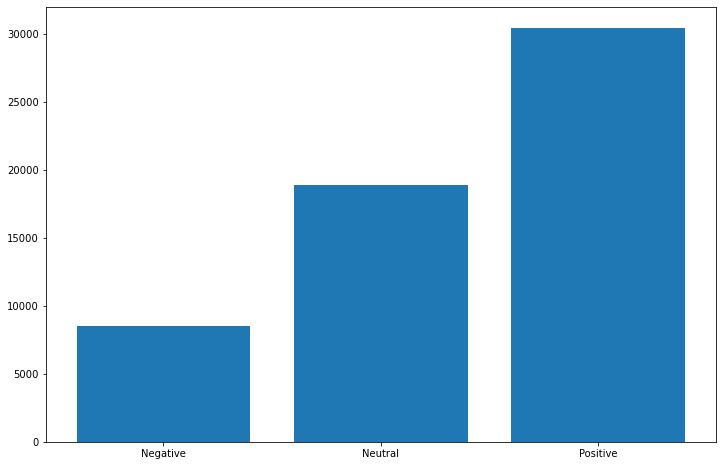

In [68]:
# visualization of scores
labels = tweets.groupby('Score').count().index.values

values = tweets.groupby('Score').size().values

plt.bar(labels, values)

In [69]:
# alternative
mask_neutral =( tweets["Score"] == "Neutral" )
tweets_neutral = tweets[mask_neutral]
mask_positive =( tweets["Score"] == "Positive" )
tweets_positive = tweets[mask_positive]
mask_negative =( tweets["Score"] == "Negative" )
tweets_negative = tweets[mask_negative]

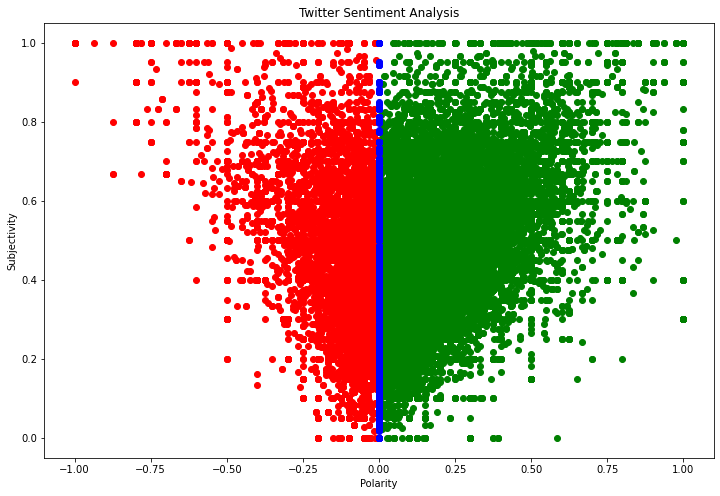

In [70]:
plt.scatter(tweets_positive['Polarity'], tweets_positive['Subjectivity'], color="green")
plt.scatter(tweets_negative['Polarity'], tweets_negative['Subjectivity'], color="red")
plt.scatter(tweets_neutral['Polarity'], tweets_neutral['Subjectivity'], color="blue")
plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
# add legend
plt.show()

In [71]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andreoliveiragomes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
example_sent = "This is a sample sentence, showing off the stop words filtration."
  
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(example_sent) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  
print(word_tokens) 
print(filtered_sentence) 

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


In [73]:
list_tweets =[tweets for tweets in tweets["content"]]

In [74]:
tweets_tokens = [word_tokenize(tweets) for tweets in tweets["content"]]

In [75]:
tweets["tokens"]= tweets["content"].apply(lambda x: word_tokenize(x))

In [76]:
tweets.tokens.head()

18755    [1/, IMF, head, Christine, Lagarde, discusses,...
22785    [BREAKING, :, Coinbase, Just, Bought, One, of,...
22887    [On, Chain, Financial, Products, and, Services...
55587    [We, packed, the, Ritz, Carlton, with, Bitcoin...
9899     [Mastercard, Eyes, Blockchain, for, Fighting, ...
Name: tokens, dtype: object

In [77]:
tweets_tokens[:7]

[['1/',
  'IMF',
  'head',
  'Christine',
  'Lagarde',
  'discusses',
  'the',
  '``',
  'promise',
  "''",
  'of',
  'cryptocurrencies',
  'and',
  'blockchain',
  ',',
  'and',
  'encourages',
  'an',
  '``',
  'even-handed',
  'approach',
  "''",
  'to',
  'regulation',
  'in',
  'a',
  'new',
  'blog',
  'post',
  '.'],
 ['BREAKING',
  ':',
  'Coinbase',
  'Just',
  'Bought',
  'One',
  'of',
  'Bitcoin',
  "'s",
  'Biggest',
  'Startups'],
 ['On',
  'Chain',
  'Financial',
  'Products',
  'and',
  'Services',
  '.',
  'from',
  ',',
  'from',
  'and',
  'from',
  'to',
  'discuss',
  'these',
  'new',
  'offerings',
  '.',
  'Get',
  'your',
  'tickets',
  'to',
  'Consensus',
  'now',
  ':'],
 ['We',
  'packed',
  'the',
  'Ritz',
  'Carlton',
  'with',
  'Bitcoin',
  'Cash',
  'supporters',
  'tonight',
  '.',
  'The',
  'last',
  'time',
  'BTC',
  'could',
  'do',
  'that',
  'was',
  'when',
  'it',
  'still',
  'worked',
  'as',
  'Cash',
  '.',
  'MondayMotivation'],
 ['Mas

In [78]:
tweets['content']=tweets['content'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))

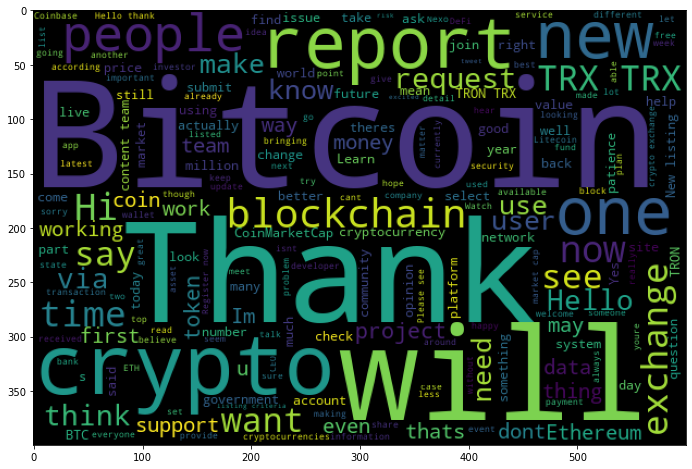

In [79]:
# Creating a word cloud
words = ' '.join([tweet for tweet in tweets['content']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

In [80]:
tweets.to_csv("tweets_cleaned_after_sentiment_analysis.csv")